<a href="https://colab.research.google.com/github/GTLibraryDataVisualization/Python-Visualization-for-Data-Science-Introduction-2020/blob/main/Python_for_data_science_Youtube_Data_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Science

    During this workshop we will give an intro to: 
    Reading in a dataset using Pandas
    Data manupulation using Pandas
    Inroduction/conversion to numpy
    simple visualizations. 

We will be using Google Collab for this. This notebook has some blank cells that we will be filling in and working through over the course of the workshop.

Data source: https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv

In [ ]:
# in case your Collab environment or even local environment returns a ModuleNotFoundError, 
# run this cell to install all the libraries we will use today.

!pip install numpy pandas seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print (sns.__version__)
print (pd.__version__)
print (np.version.version)

0.11.2
1.3.5
1.21.6


Numpy and Pandas are the premiere data manipulation packages for python.
The purpose of Pandas is to bring in the functionality of a dataframe.
This gives us a fast way to work with relational, or labeled data.
Let us look at how the basis of pandas works.

        Note: even though I will be mainly using Pandas for this exercise
        Pandas is actually built on top of Numpy, meaning a vast majority of 
        the functions we will be covering, can be used just as easily in numpy.
        
To explain the differences between the two:
            
        Numpy is used for creating Arrays - These arrays can be any number of dimensions, but 
        they do not have column or index labels - Numpy is essentially a more efficient version
        of the List in Python.
        Pandas is used for dataframes - This is more organized data that has column names AND an
        index.  It is Numpy with a more mandatory structure.

## Import data

In [8]:
# the first way to upload file is by using files function of Google Colab and upload it from your device

from google.colab import files
uploaded = files.upload()
fp = open("Youtube_CAvideos_clean.csv","r") 


Saving Youtube_CAvideos_clean.csv to Youtube_CAvideos_clean (1).csv


In [9]:
df = pd.read_csv(fp)
df.head(5)
#as we can see below, we have a dataframe, we have labeled columns, and numbered rows.  
#This will allow us to quickly isolate rows or columns and perform operations on them quickly 

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,False,False,False
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,False,False,False
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095828,132239,1989,17518,False,False,False
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,33523622,1634130,21082,85067,False,False,False


In [10]:
# seeing more structural info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   views                   40881 non-null  int64 
 5   likes                   40881 non-null  int64 
 6   dislikes                40881 non-null  int64 
 7   comment_count           40881 non-null  int64 
 8   comments_disabled       40881 non-null  bool  
 9   ratings_disabled        40881 non-null  bool  
 10  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(3)
memory usage: 2.6+ MB


## Clean / Format the data

### Shrink down the data with selected columns

In [18]:
# trim off columns we are not going to use for this workshop
df_simp = df[[ "category_id", "views", "likes", "dislikes", "comment_count","comments_disabled","ratings_disabled"]]

# we want to convert category to a string instead of a number

print (df_simp.dtypes)

category_id          int64
views                int64
likes                int64
dislikes             int64
comment_count        int64
comments_disabled     bool
ratings_disabled      bool
dtype: object


### Check values in columns and clean the messy data

The first manipulation we would want to make is only select columns we may want to work with, and ignore columns we do not. 

### Sort the data by categories

In [19]:
df_sort = df_simp.sort_values(["views", "likes", "dislikes", "comment_count"], ascending=[False, False,False,False])
df_sort
#To make our data is more viewable, we will use the function dataframe.sort_values
#With this, we can first sort by the numbers of views, then sort by likes
#To sort from the greatest to the least, by setting ascending = to false!

#look how readable our results are!

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
5900,24,137843120,3014479,1602383,817582,False,False
5623,24,125431369,2912715,1545018,807558,False,False
5398,24,113876217,2811217,1470387,787174,False,False
5197,24,100911567,2656678,1353655,682890,False,False
34361,10,98938809,3037318,161813,319502,False,False
...,...,...,...,...,...,...,...
579,27,1141,0,0,0,False,False
20505,24,1107,14,1,3,False,False
18076,17,1023,65,5,23,False,False
18045,25,1000,46,19,0,True,False


## Basic Statistical Analysis 

Overview of statistics of the whole dataset.

In [22]:
#Finally, what if before all colorful graphs, we want to know the statistical aspects about our data?
#Pandas again, comes to the rescue and makes it fairly simple to collect numbers

print("Total views of all trending videos are: {}".format(df.views.sum()))
print("Average views of all trending videos are: {}".format(df.views.mean()))
print("Total likes of all trending videos are: {}".format(df.likes.sum()))
print("Total comments of all trending videos are: {}".format(df.comment_count.sum()))



Total views of all trending videos are: 46891975069
Average views of all trending videos are: 1147035.9107898534
Total likes of all trending videos are: 1618179878
Total comments of all trending videos are: 206161849


In [17]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


In [25]:
corr = df["likes"].corr(df["comment_count"])
corr

0.8365847184980609

Compare the overall statistical distribution to a subset of data.

In [26]:
#let's review the categories and see what we got here.
categories = df_sort.category_id.unique()
print (categories)
    
a =df_sort["category_id"].value_counts()
print (a)

[24 10 22 28 26  1 17 29 20 23 27 25  2 15 30 19 43]
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64


Create a subcategory of the dataset.

In [32]:
# we can create a sub-dataset with a few categories to work on.
cat_list=[25,28,17,10]
cats =df_sort.loc[df_sort["category_id"].isin(cat_list)]
cats.head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
34361,10,98938809,3037318,161813,319502,False,False
34131,10,85092067,2735961,140711,289682,False,False
36453,10,80738011,5053338,165854,1114800,False,False


In [35]:
#Lets look at Category 24 statistics to further analyze their data
cats_stats= cats.describe()
cats_stats
#This is cool and all, but I need something to compare it to!

,category_id,views,likes,dislikes,comment_count
count,11832.000000,1.183200e+04,1.183200e+04,11832.000000,1.183200e+04
mean,18.678499,1.624172e+06,5.911229e+04,2572.663371,6.471062e+03
std,6.851696,4.372755e+06,1.993630e+05,9419.807886,2.798494e+04
min,10.000000,1.000000e+03,0.000000e+00,0.000000,0.000000e+00
25%,10.000000,1.327885e+05,1.468000e+03,106.000000,4.330000e+02
50%,17.000000,3.925215e+05,6.672500e+03,357.500000,1.477000e+03
75%,25.000000,1.238232e+06,3.780875e+04,1306.500000,4.295500e+03
max,28.000000,9.893881e+07,5.053338e+06,165854.000000,1.114800e+06


Now we are going to move into Visualizing and Analyzing our data!

    for this, we will be using a relatively new data vizualization package called Seaborn
    If you are familiar with Matplotlib, it is similar and based on Matplotlib. 
    The difference is something that takes 10 lines in matplotlib, can be done in 1 with seaborn, 
    making it ideal for super quick and easy visualizations. In fact, it actually inherits a lot of 
    what it does from matplotlib. For example, in order to change the title, we will be calling a 
    matplotlib function, not a seaborn one!  
    
    To make it even better, its built to work with Pandas!
    Lets look at the example below to see how we can make a plot with a line of best fit
     

     

## Visualization

In [36]:
#give an outline or plan for viz types
for col in cats:
    print (col)

category_id
views
likes
dislikes
comment_count
comments_disabled
ratings_disabled


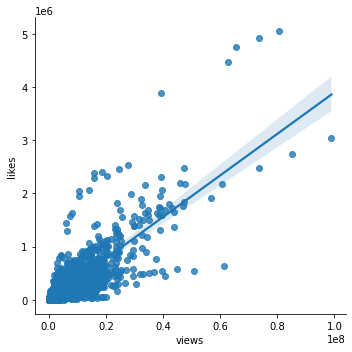

In [38]:
#so we renamed seaborn as sns.  Now let's call sns.lmplot, which stands for linear model plot
#It will include both our X and Y scatterplot, and automatically 

import seaborn as sns
sns.lmplot(x="views", y="likes",data=cats)
#As you can see, we created a beautiful viz with only 1 line of code, and needed   
# one more to add a title!  That is powerful.

Text(0.5, 1.0, 'Youtube Videos Views vs. Dislikes')

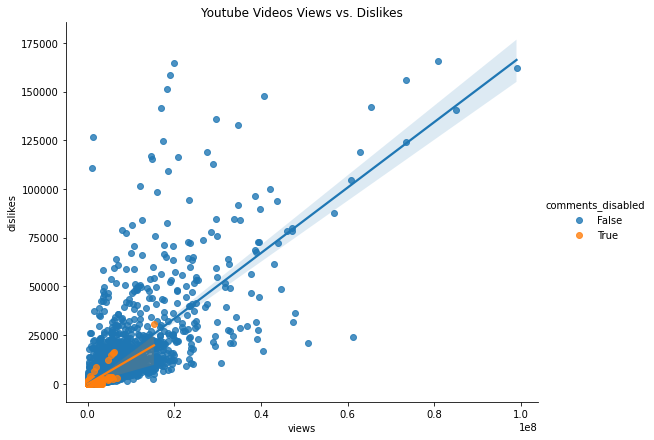

In [41]:
#Seaborn's custemization features
#Let's see how it can define colors of the variables and resize the charts.

g = sns.lmplot(x="views", y="dislikes", data=cats, legend="full", hue="comments_disabled", height=6, aspect=1.3, )  
plt.title('Youtube Videos Views vs. Dislikes')

#In addition, lets learn how to save this graph!


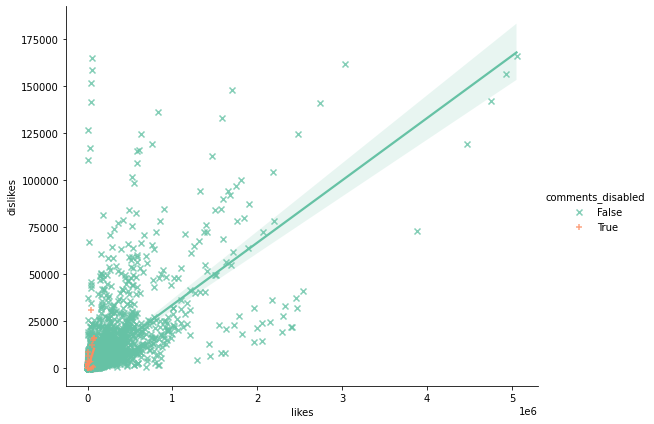

In [42]:
# On top of that, Seaborn can also assign markers and apply new palette to the charts.

sns.lmplot(x="likes", y="dislikes", hue="comments_disabled", data=cats, markers=["x", "+"], palette="Set2", height=6, aspect=1.3)

### Categorical scatterplots

* `catplot()`
* `stripplot()`
* `swarmplot()`

In [43]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11832 entries, 34361 to 18045
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   category_id        11832 non-null  int64
 1   views              11832 non-null  int64
 2   likes              11832 non-null  int64
 3   dislikes           11832 non-null  int64
 4   comment_count      11832 non-null  int64
 5   comments_disabled  11832 non-null  bool 
 6   ratings_disabled   11832 non-null  bool 
dtypes: bool(2), int64(5)
memory usage: 577.7 KB


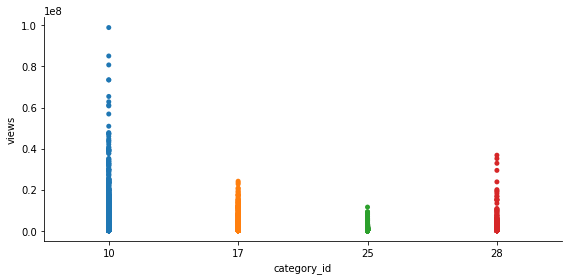

In [44]:
#The default “kind” in catplot() is stripplot().
#It is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:


#If you wish to remove the jitter effect, just set jitter function as False.
sns.catplot(x="category_id", y="views",jitter=False, data=cats, height=4, aspect=2) # Removes random X-axis noise

The second approach, the swarmplot(), uses algorithm to avoid data points from overlapping each other.

For this approach you cannot have too large of a dataset tho, as there may not be enough space to show 
all of them.

Below we create a subset of of cats dataset to demonstrate.

In [45]:
df_swarm=cats.head(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; y

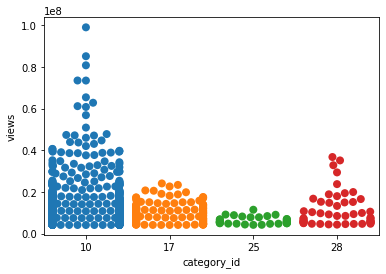

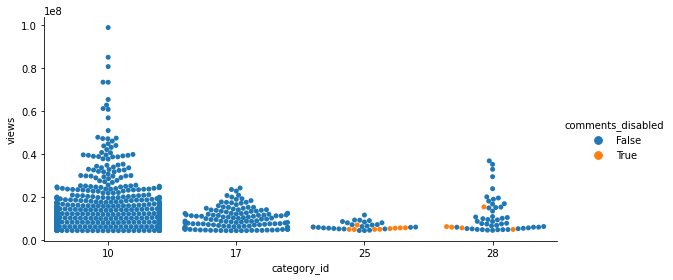

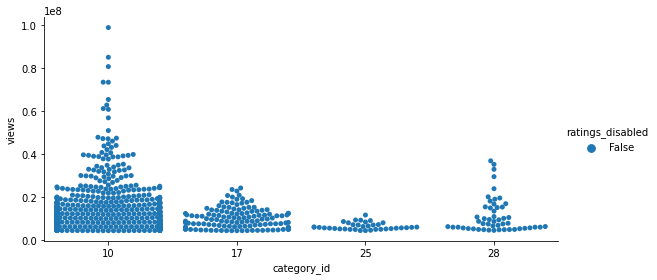

In [46]:
sns.swarmplot(x="category_id", y="views", data=df_swarm, size=8)

sns.catplot(x="category_id", y="views", kind="swarm",hue="comments_disabled", data=df_swarm, height=4, aspect=2) # Swarm Plot
sns.catplot(x="category_id", y="views", kind="swarm",hue="ratings_disabled", data=df_swarm, height=4, aspect=2) # Recolors to add a new dimension

### Categorical distribution plots

* `boxplot()`
* `violinplot()`
* `boxenplot()`

In [47]:
df_cat = cats[:700]
df_cat = df_cat[df_cat["comments_disabled"]==False]

df_cat.head(5)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
34361,10,98938809,3037318,161813,319502,False,False
34131,10,85092067,2735961,140711,289682,False,False
36453,10,80738011,5053338,165854,1114800,False,False
36153,10,73463137,4924056,156026,1084435,False,False
33916,10,73432600,2478908,124291,263984,False,False


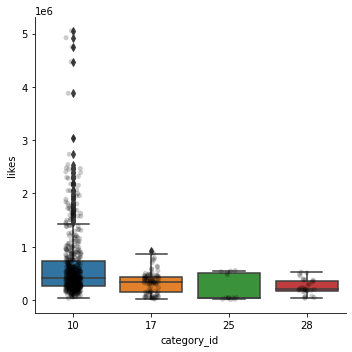

In [48]:
sns.catplot(x="category_id", y="likes", kind="box", data=df_cat)
sns.stripplot(x="category_id", y="likes", data=df_cat, alpha=0.2,jitter=0.1,color='k')


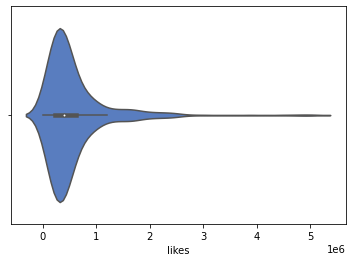

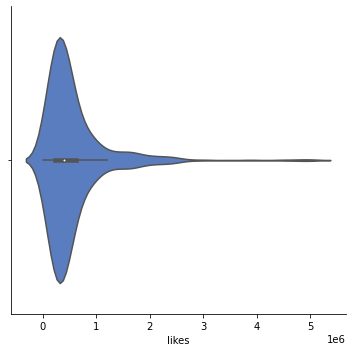

In [49]:
sns.violinplot(x="likes", palette="muted", data=df_cat)
sns.catplot(x="likes", palette="muted", kind="violin", data=df_cat)
# sns.catplot(x="likes", y="category_id",  kind="violin",  split=True, inner="stick", data=df_cat)

## Categorical estimate Plots
* `pointplot()`
* `barplot()`
* `countplot()`

A bar plot represents an estimate of data tendency.
The height of each rectangle represents the central tendency for a numeric variable.
The black bar on top provides some indication of the uncertainty around that estimate using error bars.

barplots and countplots are simpler ways of implementing the same functions as a bar catplot, 
what you need (control vs simlicity) determines which one you pick.

In [52]:
#sns.catplot(x="category_id", kind="swarm", palette="ch:.25", data=cats, height=4, aspect=2) #hue="",

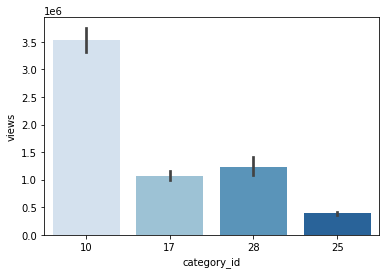

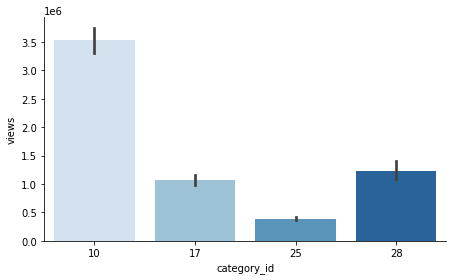

In [55]:
sns.barplot(x="category_id", y="views", order=[10,17,28,25], data=cats, palette="Blues")
sns.catplot(x="category_id", y="views", kind="bar", data=cats, height=4, aspect=1.6, palette="Blues")

# by default these black lines represent our confidence interfval, which we can remove with "ci=None".
# the default uses the standard deviation

## Regressions

Two main functions in seaborn to visualize a linear relationship as determined through regression are regplot() and lmplot(). They share much of  core functionality: both plots draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

Differences: 
1. regplot() accepts the x and y variables in a variety of formats, lmplot() has data as a required parameter and the x and y variables must be specified as strings
2. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

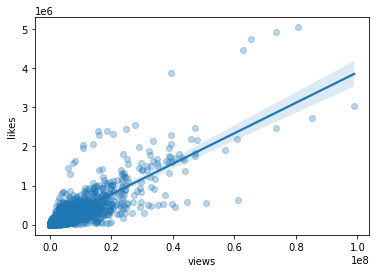

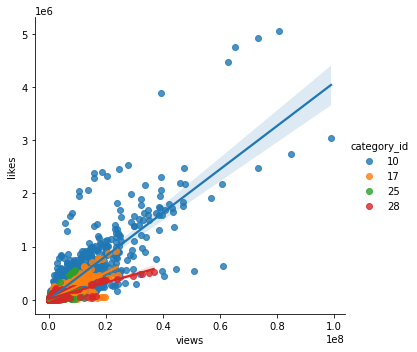

In [56]:
sns.regplot(x="views", y="likes", data=cats, scatter_kws={'alpha':0.3})
sns.lmplot(x="views", y="likes", hue="category_id", data=cats)

Other than the shape of our charts `sns.regplot()` and `sns.lmplot()` create some similar linear regressions. Thats normal as `sns.regplot()` combines `sns.regplot()` with a `FacetGrid`. This basically means with `sns.lmplot()` we can explore relationships between more than two variables.

And exploring different variables through subplots.

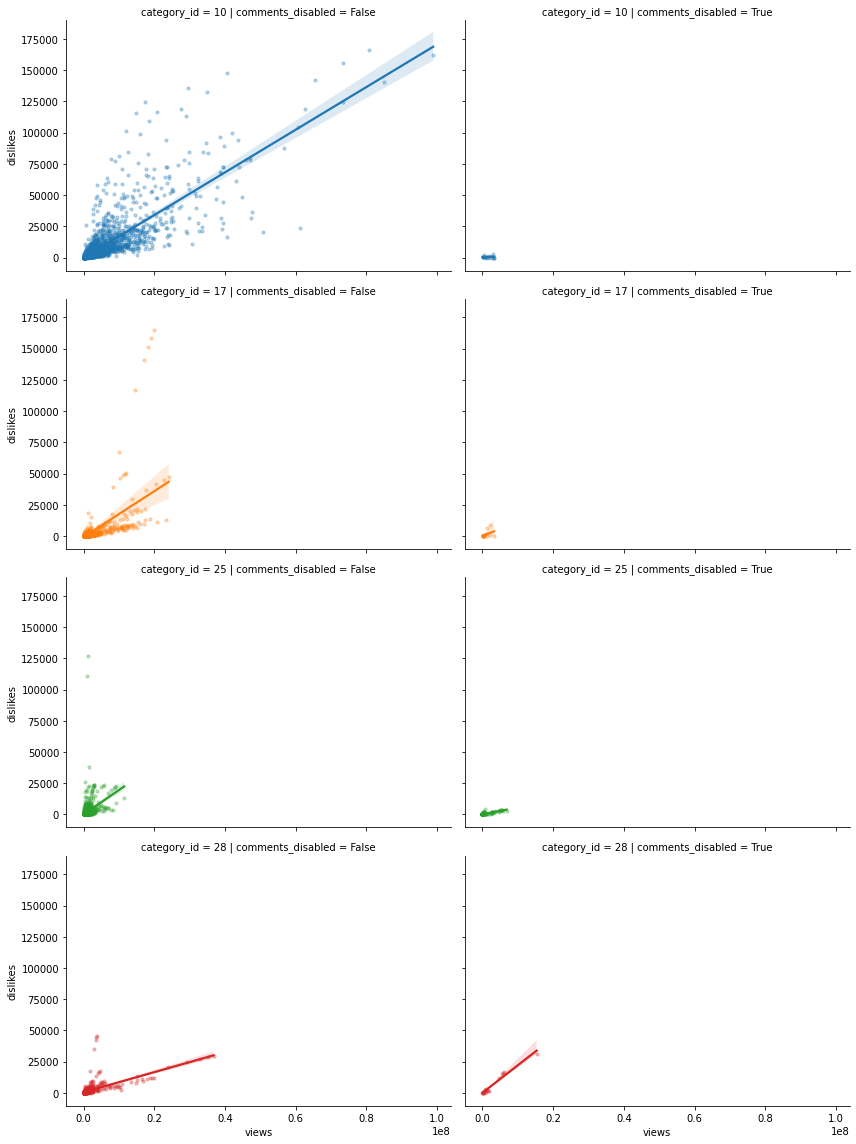

In [62]:
sns.lmplot(x="views", y="dislikes", data=cats, hue="category_id",  row="category_id",col="comments_disabled", scatter_kws={'alpha':0.3, "s":10}, height=4, aspect=1.5)

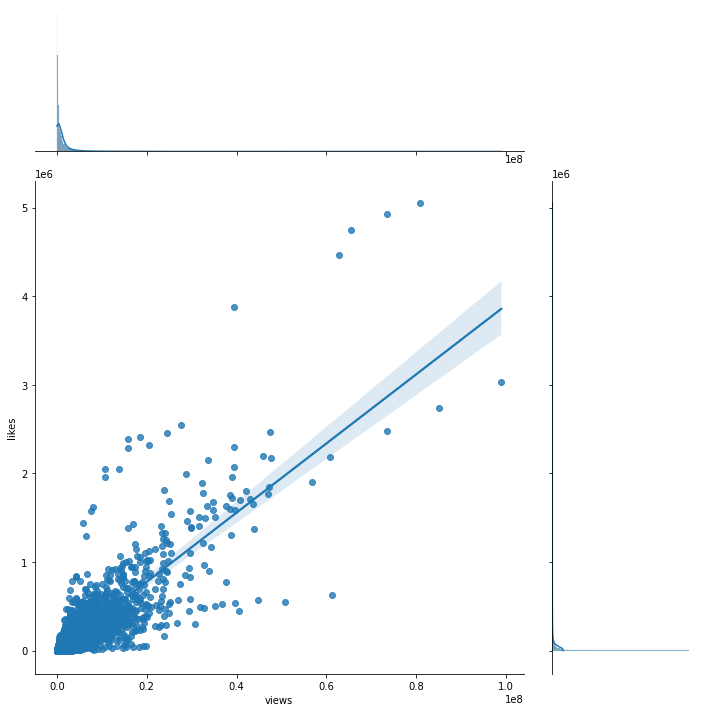

In [58]:

sns.jointplot(x="views", y="likes", data=cats, kind="reg", height=10, ratio=3) #kind: 'scatter', 'reg', 'resid', 'kde', or 'hex'


Sometimes we have data where a linear regression doesnt quite make sense though:

### Nonlinear Regressions

In [ ]:
# anscombe = sns.load_dataset("anscombe")
# sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)
sns.lmplot(x="views", y="comment_count", data=cats, x_estimator=np.mean, logx=True)

This concludes the lesson

        In this we went through
            The basics of filtering in Pandas
            Syntax for numpy and pandas
            Advanced dataframe creation techniques
            Beautiful vizualizations using Seaborn
            Computing Statistics in Pandas

https://seaborn.pydata.org/api.html